# 03 | Other Online Sources (Dezeen, Facebook, Instagram)

### Preprocessing functions

Tokenize

In [3]:
import pandas as pd
from os import listdir
from os.path import isfile, join

import json, re, operator, string, nltk, pickle
from nltk.tokenize import word_tokenize

regex_str = [
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs

    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)

def tokenize(s):
    return tokens_re.findall(s)

def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

### Loading the Dezeen Posts

* Collected using scrapy (see documentation)

In [29]:
dezeentech = [x.strip() for x in open('Dezeen_MINING/dezeentech_allposts.txt', 'r').readlines() if x and x.strip()] 
print(dezeentech[:1])

['has .  that it is releasing the iPhone X, which the tech company claims is "the biggest leap forward since the original . ".. As expected, the iPhone X includes facial recognition technology for unlocking the phone and protecting data, and a corner-to-corner display.. "This is the biggest leap forward since the original iPhone," said CEO Tim Cook, who unveiled the product during today\'s Apple Event, when the company also revealed the iPhone 8 and iPhone 8 Plus.. The iPhone X incorporates Apple\'s new Face ID feature. This technology is enabled through the "True-depth" camera system along the top of the front display.. The small bar incorporates a flood illuminator, which detects the face, and a dot projector that puts out 30,000 dots and creates a mathematical model of the face.. Software then compares the image to the one stored, and unlocks the phone if they match. Apple assures that it won\'t be fooled by photographs or masks.. "Your iPhone now recognises you, even in the dark, a

## 1) Word Frequencies and Wordclouds

Import the necessary libraries and lists of stopwords.

In [30]:
from nltk.corpus import stopwords
from collections import Counter
from itertools import chain
from nltk.probability import FreqDist
from nltk import bigrams 

import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

#stopwords
stop = stopwords.words('english') + list(string.punctuation) 

# lists for corpus comparison
corpus_dezeentech = []

In [31]:
# Frequency function
def count_freq(text, corpus):
    text_terms = [term for term in preprocess(' '.join(map(str, text)))]
    all_tokens = [x.lower() for x in text_terms]
    # Count All Tokens
    tokens_number = len(all_tokens)
    corpus.append(('total tokens', tokens_number)) # update corpus comparison
    print('Total number of words in the collection: ', tokens_number)
    # remove stop words
    words = [term for term in all_tokens if term not in stop and len(term)>2]
    corpus.append(('meaningful words', len(words))) # update corpus comparison
    print('Total number of meaningful words (without stopwords and links): ', len(words))
    # Count terms only once, equivalent to Document Frequency
    unique_words = set(words)
    corpus.append(('unique words', len(unique_words))) # update corpus comparison
    print('Number of unique terms: ', len(unique_words))
    return words, corpus

### Word Frequency

#### DezeenTECH

In [32]:
# Count all words
# Calculate word frequency for all terms (including hashtags and mentions)
words_dezeentech, corpus_dezeentech = count_freq(dezeentech, corpus_dezeentech)
words_dezeentech_freq = FreqDist(words_dezeentech)
print('The 100 most frequent terms, including special terms: ', words_dezeentech_freq.most_common(100))

Total number of words in the collection:  905614
Total number of meaningful words (without stopwords and links):  421330
Number of unique terms:  31561
The 100 most frequent terms, including special terms:  [('design', 2953), ('new', 2176), ('like', 2157), ('technology', 2133), ('would', 1979), ('could', 1861), ("it's", 1843), ('one', 1740), ('people', 1711), ('said', 1709), ('also', 1625), ('first', 1298), ('make', 1243), ('use', 1226), ('used', 1196), ('using', 1141), ('apple', 1070), ('way', 1066), ('create', 1063), ('printing', 1025), ('think', 1010), ('project', 1007), ('see', 948), ('time', 928), ('future', 926), ('digital', 921), ('designed', 914), ('car', 914), ('company', 897), ('made', 894), ('world', 883), ('work', 877), ('really', 857), ("don't", 833), ('dezeen', 778), ('get', 766), ('designers', 746), ('need', 738), ('much', 734), ('something', 696), ('around', 691), ('device', 690), ('designer', 690), ('years', 670), ('says', 666), ('want', 658), ('well', 654), ('differen

In [33]:
print(corpus_dezeentech)

[('total tokens', 905614), ('meaningful words', 421330), ('unique words', 31561)]


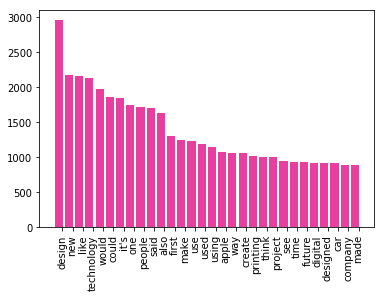

In [8]:
popularwords = words_dezeentech_freq.most_common(30)
labels, values = zip(*popularwords)
#print(labels, values)
# sort your values in descending order
indSort = np.argsort(values)[::-1]
# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))
bar_width = 0.35
plt.bar(indexes, values, color='#E83F9E')
# add labels
plt.xticks(indexes + bar_width, labels, rotation='vertical')
plt.show()

In [10]:
### WRITING IT DOWN
with open('wordfrequency_dezeentech.txt', 'wb') as f:
    pickle.dump(words_dezeentech_freq.most_common(), f)

### to read back: 
#with open ('wordfrequency_scrape.txt', 'rb') as f:
    #words_only_scrape_freq = pickle.load(f)

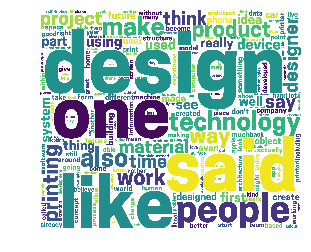

In [11]:
### WORDCLOUD

# convert list of terms (stream_terms_only) into a string
words = ' '.join(words_dezeentech)
# specify fonts, stopwords, background color and other options
wordcloud = WordCloud(font_path='/Users/zoza/Library/Fonts/CooperHewitt-Bold.otf',
                          stopwords=open('Twitter_MINING/twitter-sentiment-analysis-stopwords.txt').read().split(),
                          background_color='white',
                          width=2400,
                          height=2000
                         ).generate(words)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

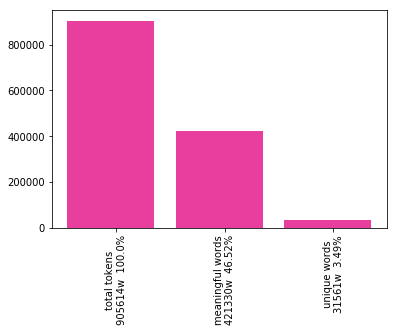

In [46]:
labels, values = zip(*corpus_dezeentech)
labelstext = [str(lab)+str('\n')+str(val)+'w  '+str(round(val/corpus_dezeentech[0][1]*100, 2))+'%' for lab,val in corpus_dezeentech]
# rearrange your data
labels = np.array(labelstext)
values = np.array(values)
indexes = np.arange(len(labels))
bar_width = 0.25
plt.bar(indexes, values, color='#E83F9E')
# add labels
plt.xticks(indexes + bar_width-0.2, labels, rotation='vertical')
plt.show()

## 2) Term Co-Occurences

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

def search_coocurrences(searchword, vectorizer):
    coocurrences = []
    for key, value in vectorizer.vocabulary_.items():
        if searchword in key:
            coocurrences.append(key)
    return coocurrences

In [14]:
# SOFT THOUGHT
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2)) 
dezeentech_coocurrences = bigram_vectorizer.fit_transform(dezeentech)
dezeentech_search_list = words_dezeentech_freq.most_common(20) # 20 most common words
with open('co-ocurrences_dezeentech.txt', 'wb') as f:
    for i in range(len(dezeentech_search_list)):
        pickle.dump(search_coocurrences(dezeentech_search_list[i][0], bigram_vectorizer), f)
        print(search_coocurrences(dezeentech_search_list[i][0], bigram_vectorizer)[:5]) # first 20 co-occurences

['chief design', 'design officer', 'is designed', 'designed to', 'in design']
['apple new', 'new face', 'the new', 'new animoji', 'plan new']
['iphone likely', 'likely to', 'never liked', 'liked the', 'behind unlike']
['recognition technology', 'technology for', 'this technology', 'technology is', 'the technology']
['again would', 'would love', 'details would', 'would soon', 'proposal would']
['but could', 'could understand', 'that could', 'could clothe', 'spacesuits could']
[]
['the iphone', 'iphone which', 'iphone includes', 'the phone', 'phone and']
['and people', 'people can', 'ordinary people', 'people driving', 'million people']
['iphone said', 'said ceo', 'changes said', 'said chief', 'he said']
['company also', 'also revealed', 'camera also', 'also allows', 'code also']
['the first', 'first time', 'aesthetic first', 'first picture', 'its first']
['to make', 'make sad', 'make it', 'crepe maker', 'maker into']
['allows users', 'users to', 'future because', 'because really', 'carp

## 3) Sentiment Analysis

## 4) Keywords extraction

Extracting keywords from the list of tweets created with the above process.

First, tested a [Python implementation of the Rapid Automatic Keyword Extraction (RAKE) algorithm] (https://github.com/zelandiya/RAKE-tutorial)

In [ ]:
import Twitter_MINING.RAKEtutorial.rake as rk
import operator
rake_object = rk.Rake('Twitter_MINING/twitter-sentiment-analysis-stopwords.txt', 4, 3, 5) # words of minimum length 4, in groups of maximum 2, occurring at least 3 times in the text; this happens to give the best results with the particular corpus

In [15]:
### SCRAPED TWEETS
# remove "float" objects: convert them to strings
dezeentech_str = ''
for item in dezeentech:
    try: 
        dezeentech_str += item
    except TypeError:
        dezeentech_str = dezeentech_str
# extract keywords
keywords_scraped = rake_object.run(dezeentech_str)
print(keywords_scraped[:30])

NameError: name 'rake_object' is not defined

[('españa #opinión #bimonyourside', 18.57099292293467), ('escuela politécnica superior', 15.6), ('photographer aurélien villette', 14.916666666666666), ('cataluña son favorables', 14.20563909774436), ('tecnología #bim transformará', 12.62938613111027), ('stéphane côté', 11.93985260770975), ('cataluña implantará', 10.148496240601503), ('españa prevé', 9.4496336996337), ('un vídeo', 9.273488865323436), ('tres años', 9.244505494505495), ('españa y', 9.175949489107385), ('cheese sandwich modeled', 9.0), ('/gr4qzza2ix #wib #wia…', 9.0), ('@portofrotterdam @ramlabnl aim', 9.0), ('roaring tide productions', 9.0), ('simulating watercolor paints', 9.0), ('staircase crush @gemeentemuseum', 9.0), ('reserveer deze datum', 9.0), ('@eraikunecluster interesantes avances', 9.0), ('sleeping bags required', 9.0), ('/xlgbmdqrjv @mcavoygroup @hadeelsafaa…', 9.0), ('f1 champ @lewishamilton', 9.0), ('veauthier meyer architekten', 9.0), ('#iluminación @icandela_com', 8.99635922330097), ('aprende cómo', 8.960884353741497), ('las ediciones anteriores', 8.921052631578947), ('audio cassette tape', 8.86111111111111), ('un referente internac…', 8.75609756097561), ('un precio especial', 8.75609756097561)]

Results are not that convincing and do not reflect the word frequency represented before. Also, they depend a lot on the parameters with which Rake is called (word length, word group size, occurrence). Below are the best results:

### Keyword Extraction: Parser

Another small script: [keyword_extraction_w_parser](https://github.com/naushadzaman/keyword-extraction-from-tweets) (made for twitter specifically) provides a very flexible way to extract keywords, and works relatively well with the entire collection of tweets converted into a single string (as explained in: Preprocessing the text of tweets). For this purpose, I modified the string to include #hashtags and @mentions.

In [16]:
import Twitter_MINING.keyword_extraction_w_parser as kep
keywords_2_scraped=kep.get_keywords(dezeentech_str)
print(keywords_2_scraped[0])

NameError: name 'reload' is not defined